In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn import ensemble
# from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df = df.drop("id",axis=1)

In [9]:
df = df[df.gender != "Other"]

In [10]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

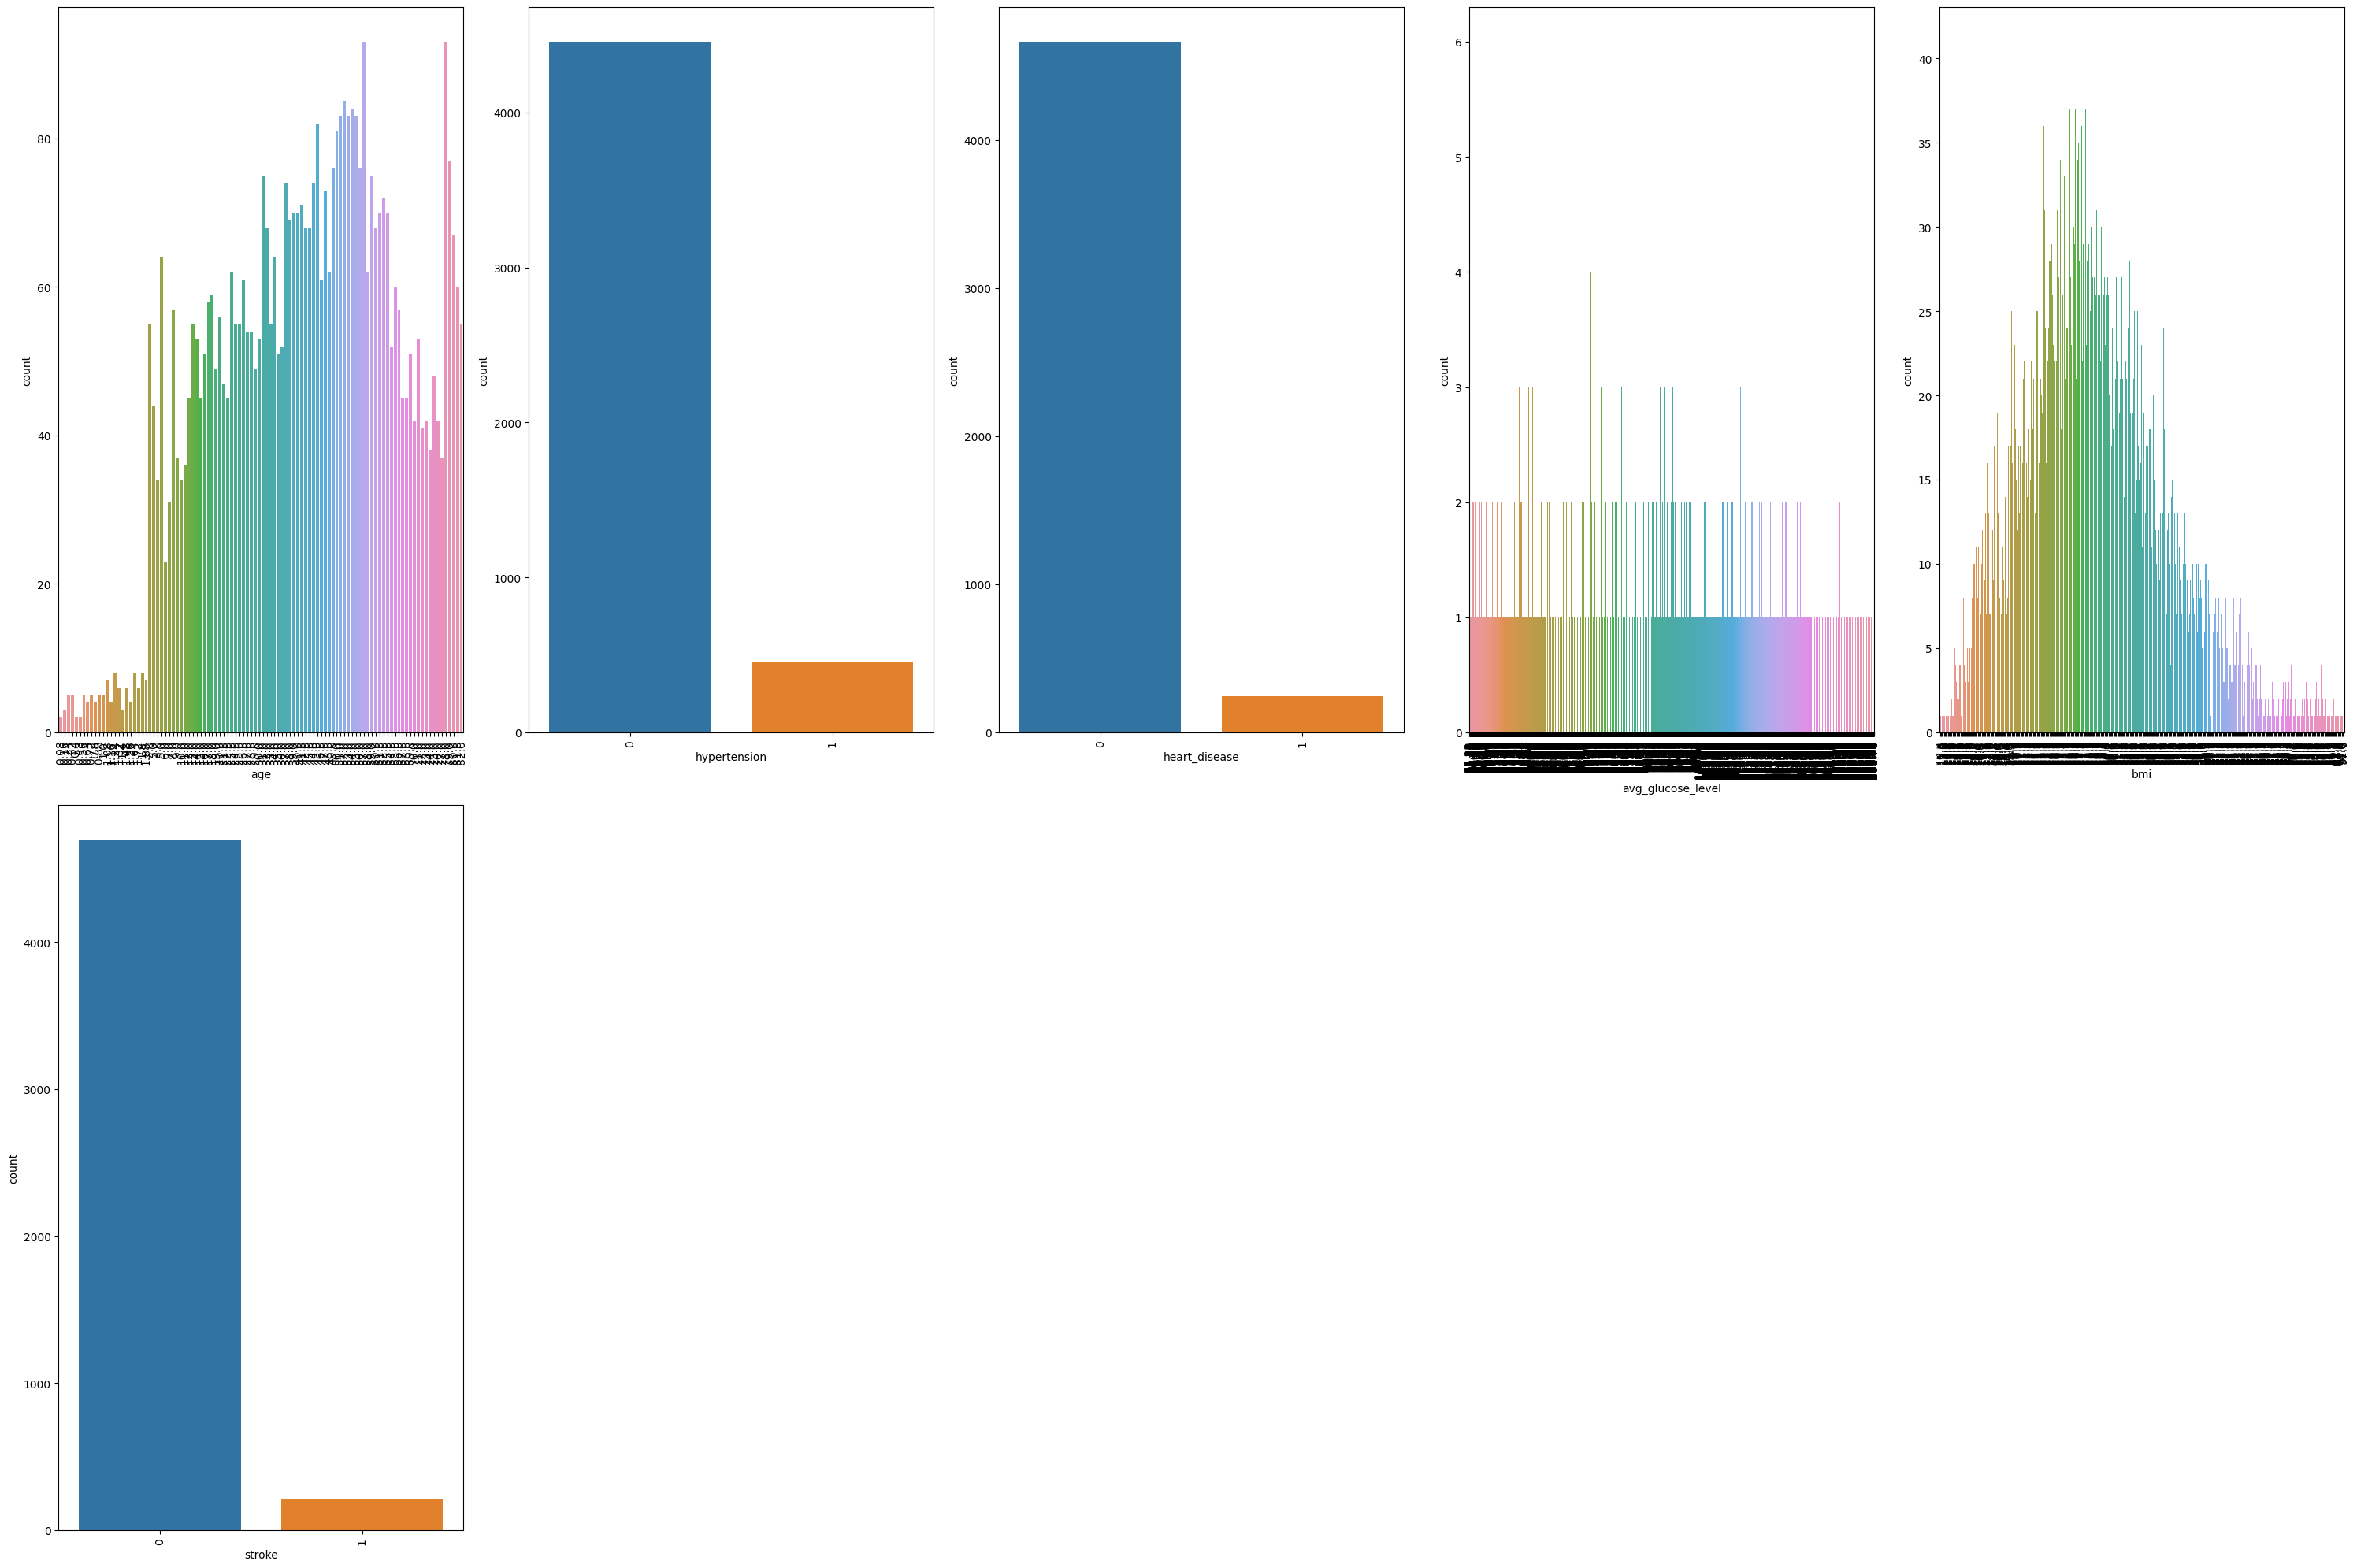

In [11]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.countplot(data=num_col,x=column)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

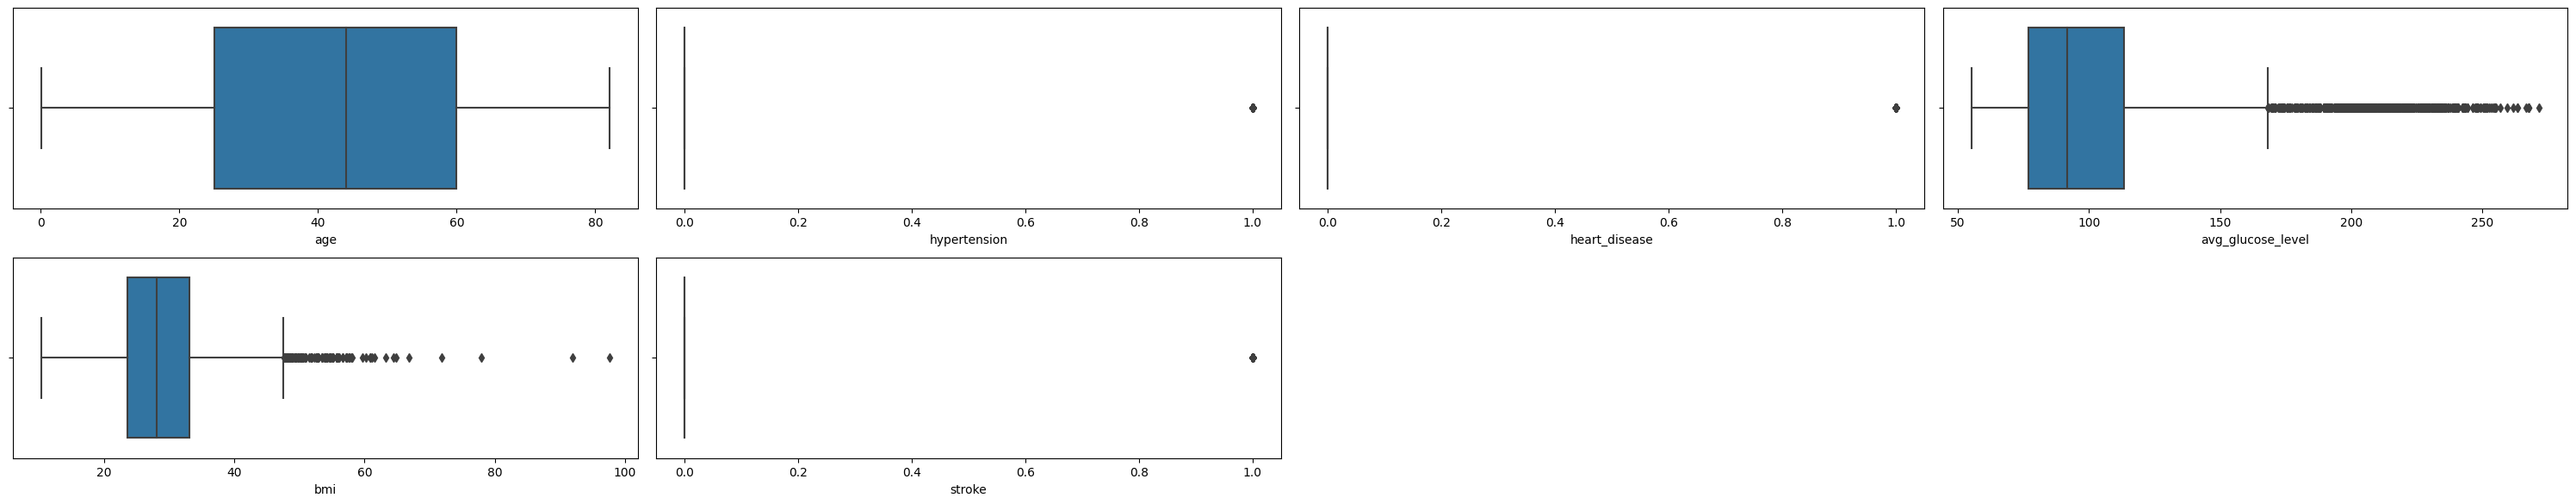

In [12]:
plt.figure(figsize=(30,20))
for index,column in enumerate(num_col):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=num_col,x=column)
    
plt.tight_layout(pad = 1.0)

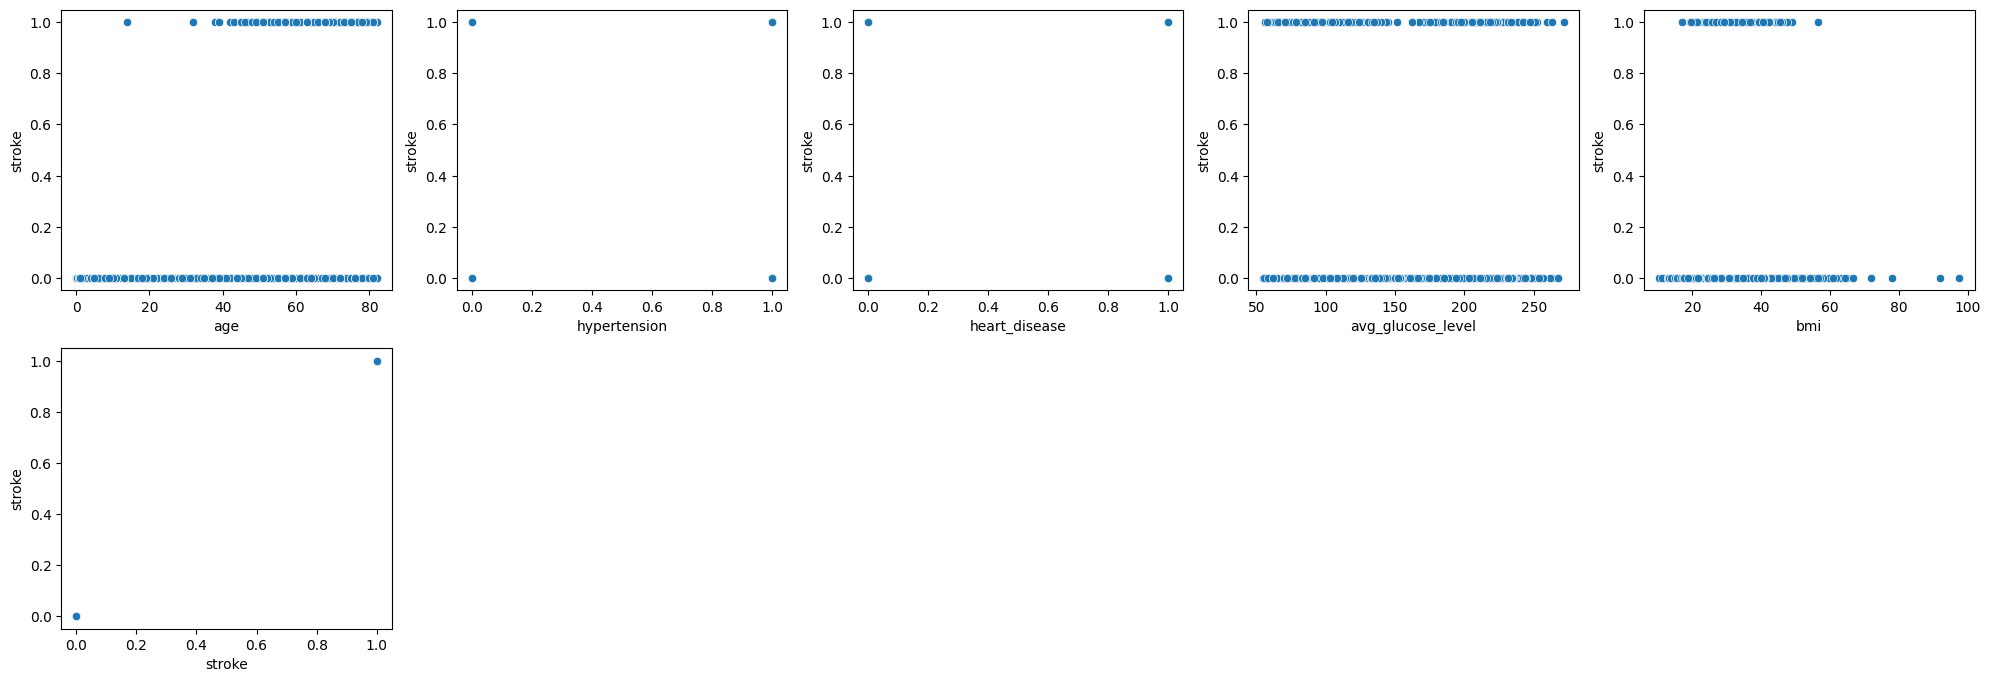

In [13]:
num_col["stroke"] = df.stroke
fig = plt.figure(figsize=(20,20))
for index in range(len(num_col.columns)):
    plt.subplot(6,5,index + 1)
    sns.scatterplot(x = num_col.iloc[:,index],y="stroke",data = num_col)
    
fig.tight_layout(pad = 1.0)

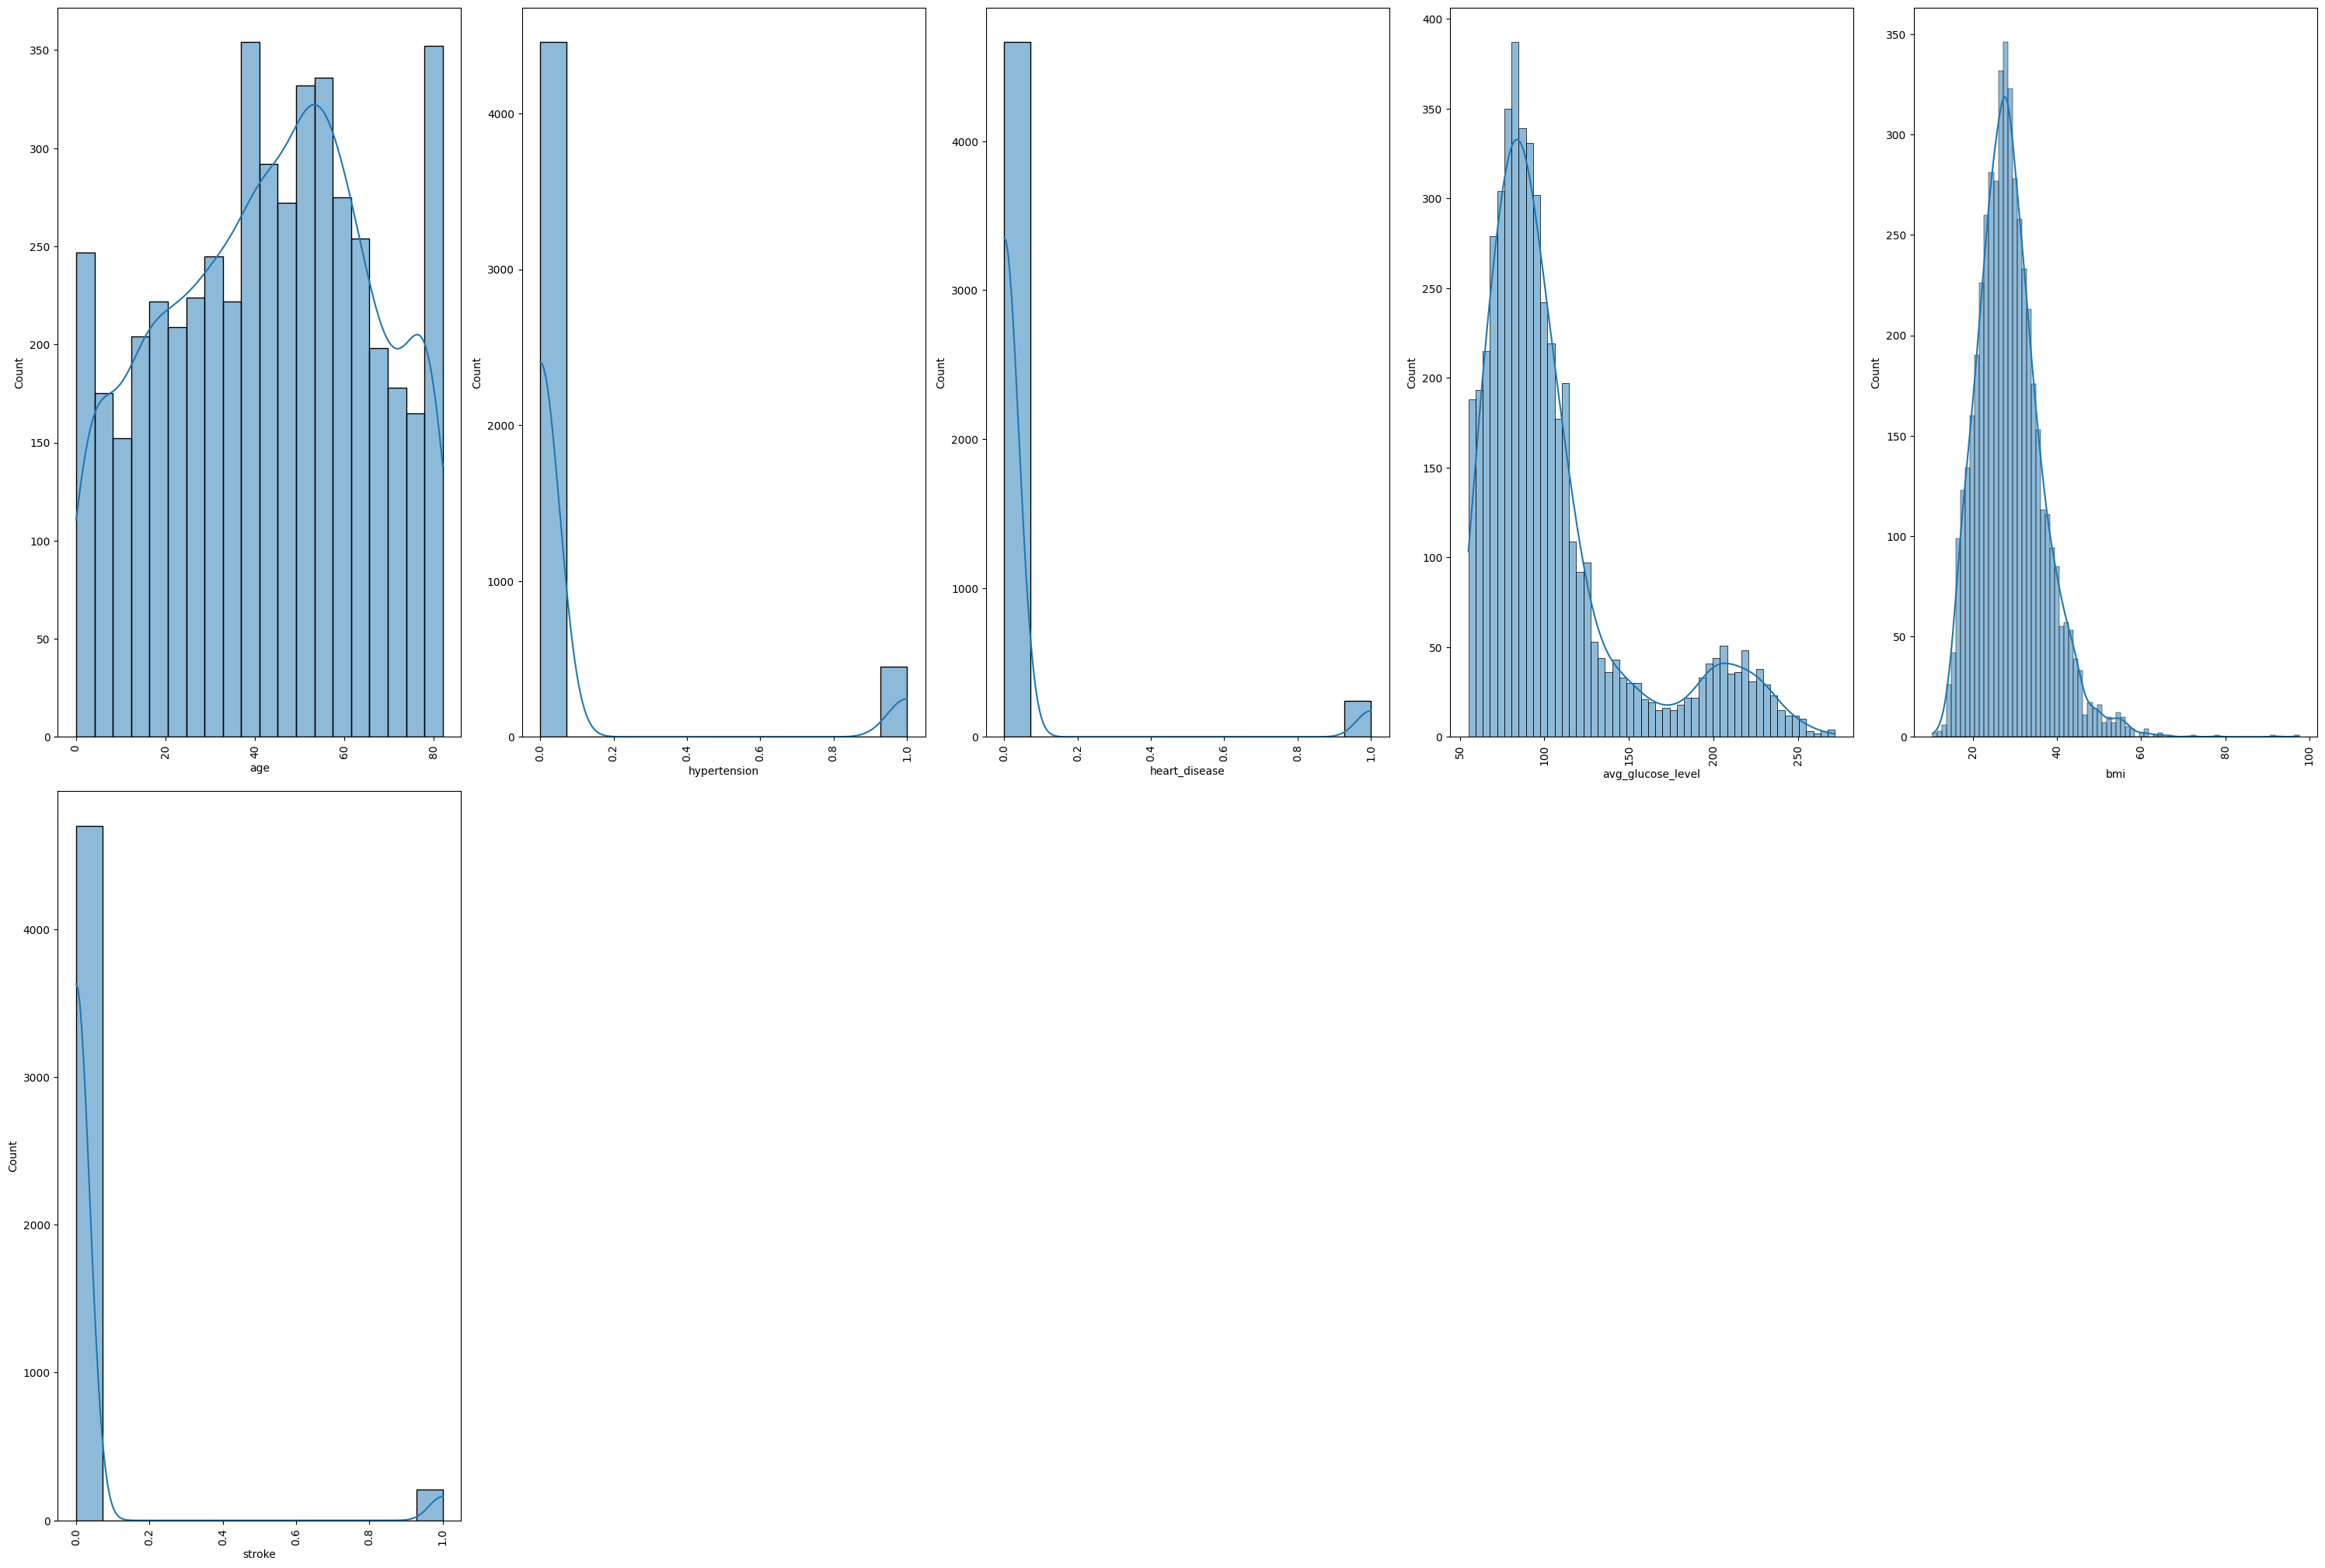

In [14]:
plt.figure(figsize=(30,50))
for index,column in enumerate(num_col):
    plt.subplot(5,5,index+1)
    sns.histplot(data=num_col,x=column,kde=True)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1.0)
plt.show()

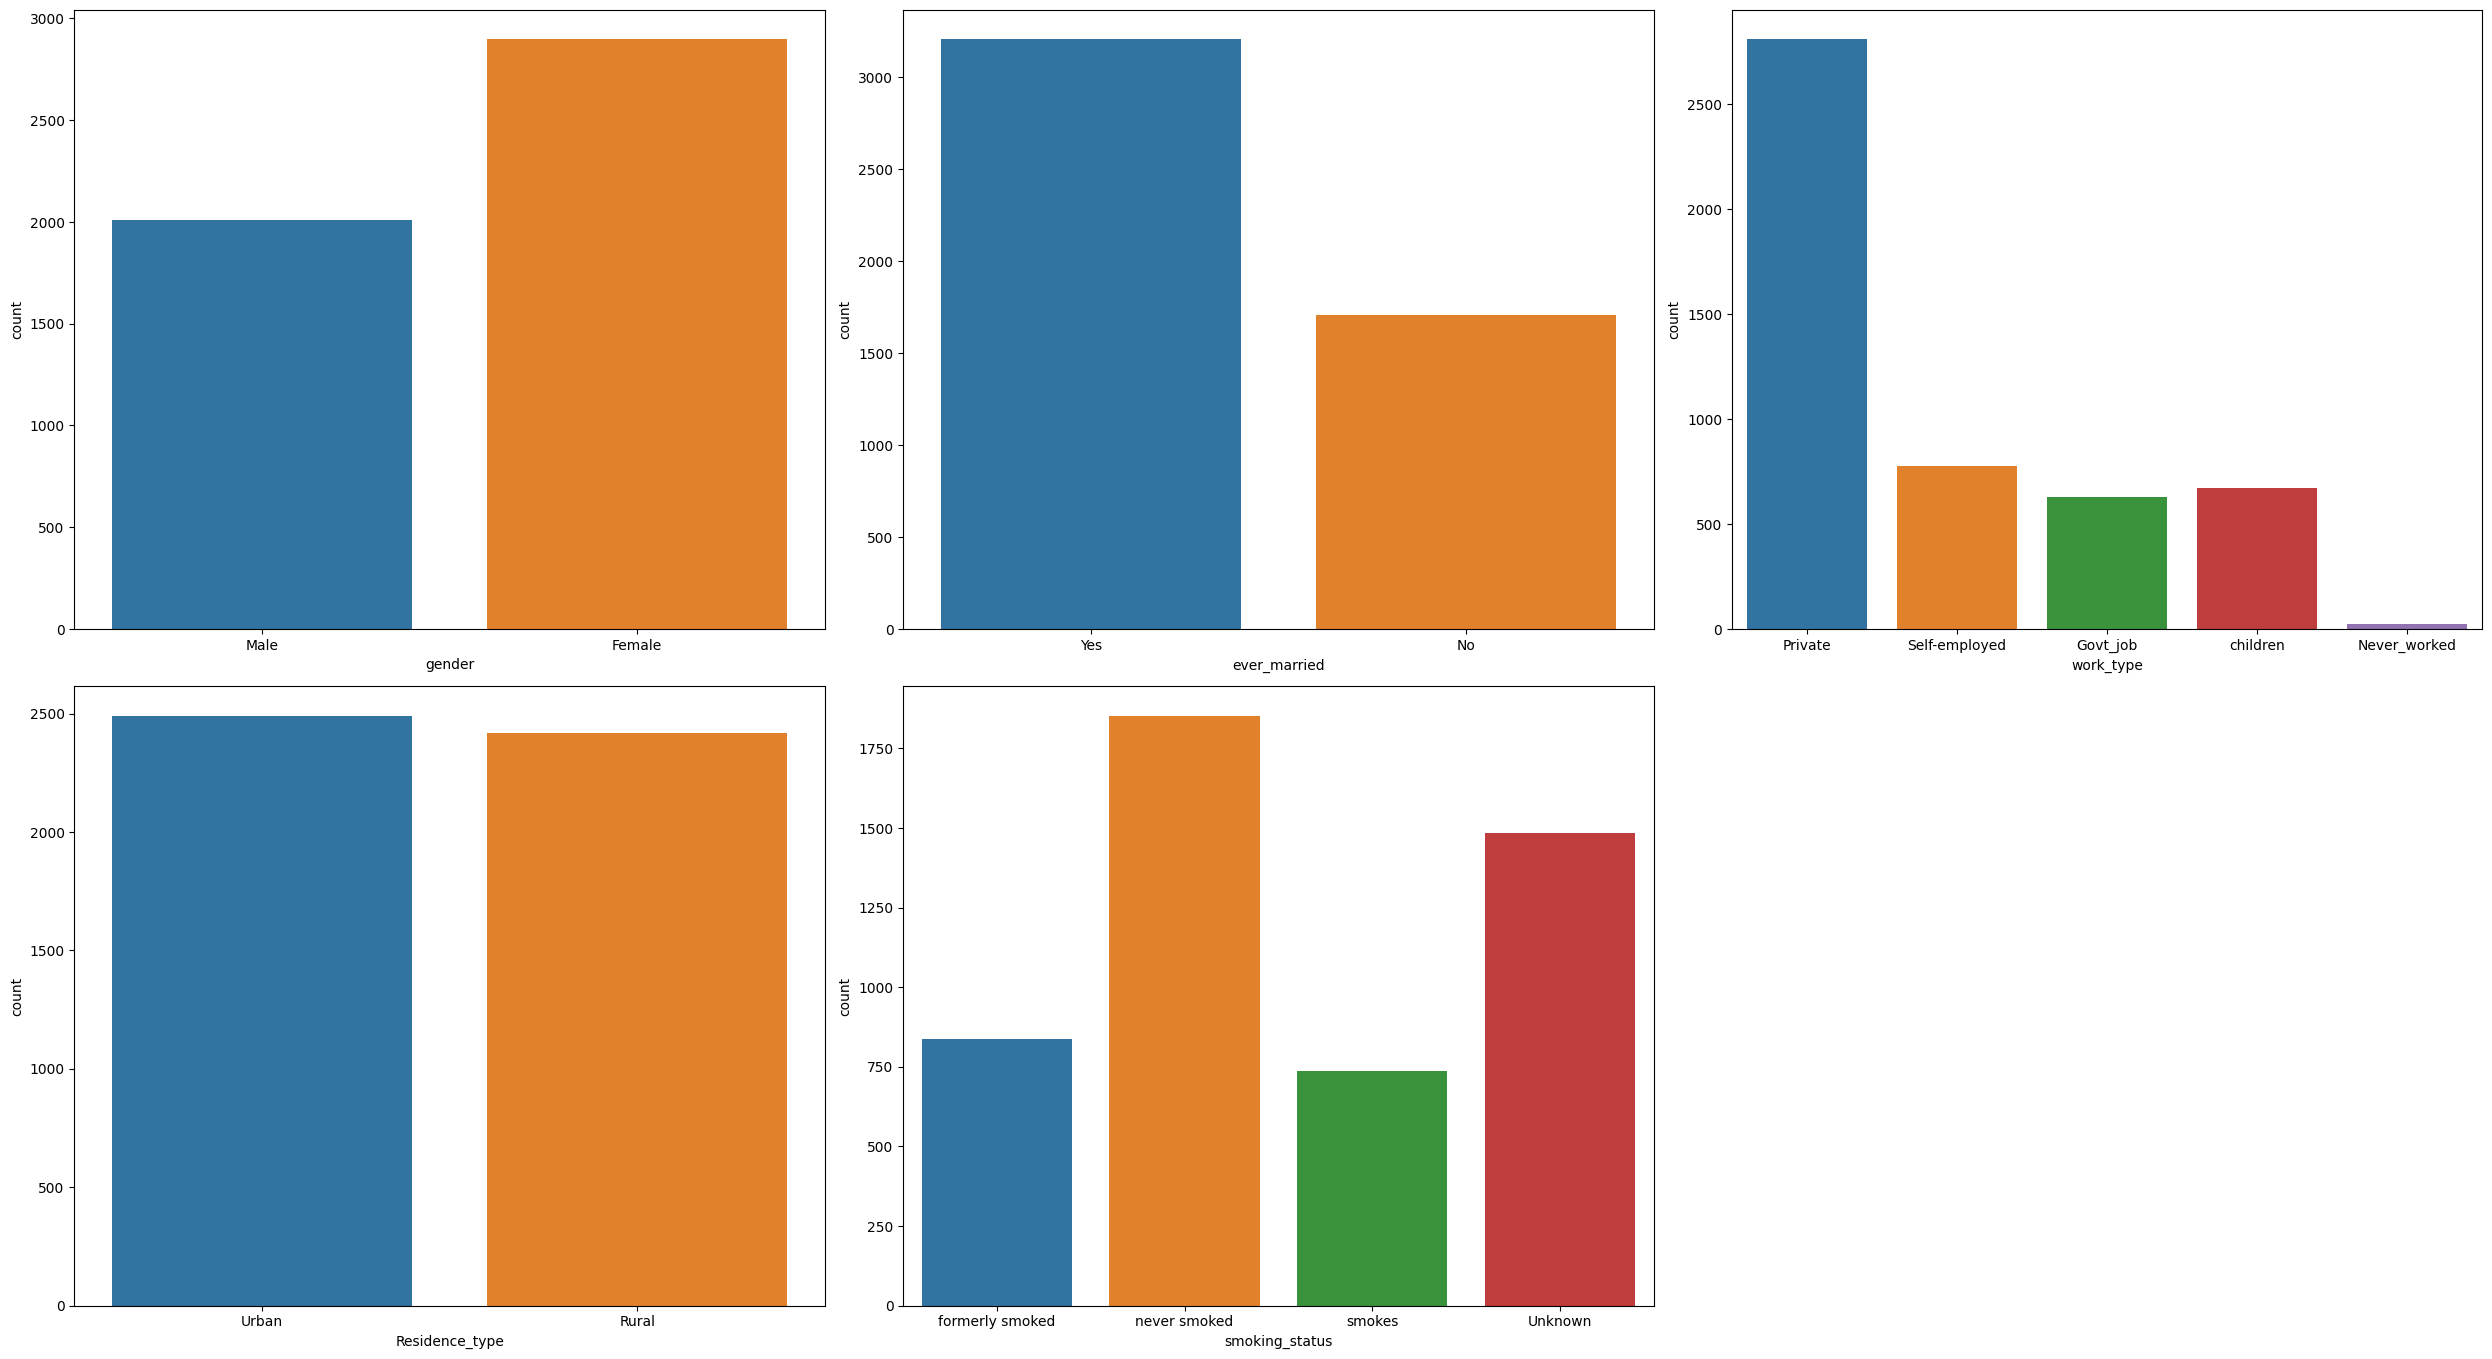

In [15]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column)
    
plt.tight_layout(pad = 1.0)
plt.show()

In [16]:
px.histogram(df,x="smoking_status",histnorm="percent",text_auto=".2f",template="plotly_dark",
             title = "Percentage of smoking Type")

In [17]:
px.histogram(df,x="smoking_status",color="stroke",barmode="group",text_auto=".2f",template="plotly_dark",
             title = "Percentage of smoke Type")

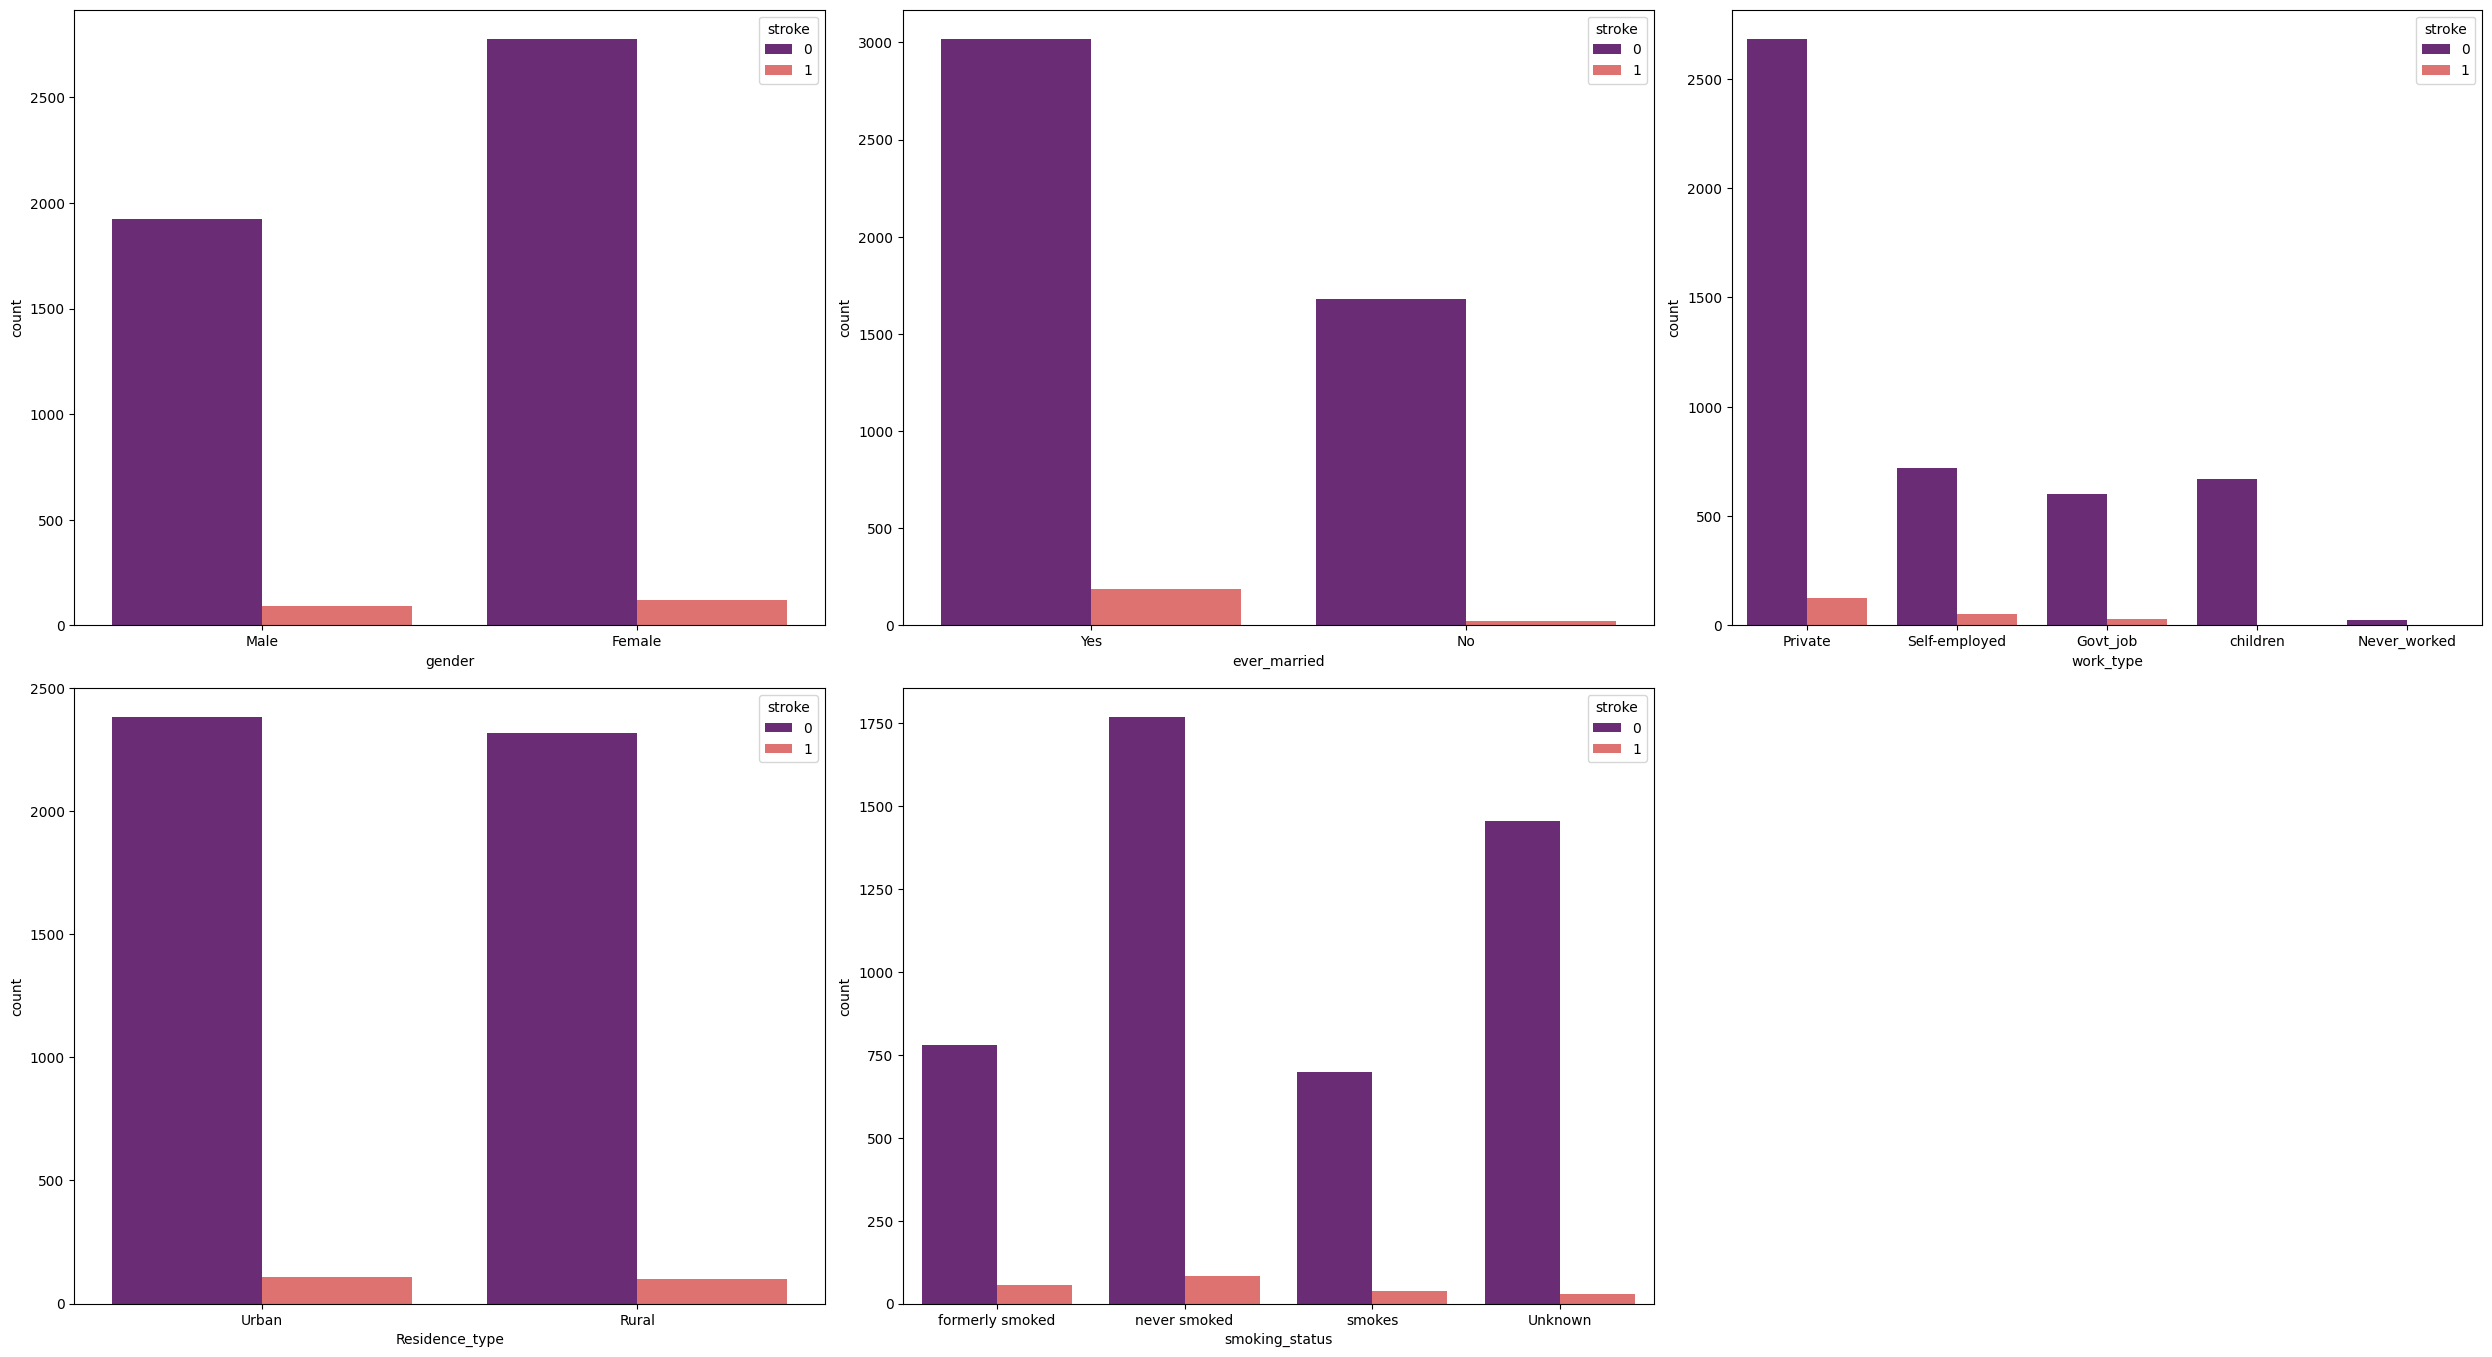

In [18]:
plt.figure(figsize=(25,20))
for index,column in enumerate(cat_col):
    plt.subplot(3,3,index+1)
    sns.countplot(data=cat_col,x=column,hue = num_col.stroke,palette="magma")
    
plt.tight_layout(pad = 1.0)
plt.show()

In [19]:
genderstroke = df[["stroke","gender"]]

In [21]:
Yesstroke = genderstroke.query('stroke == 1')
Nostroke = genderstroke.query('stroke == 0')
Yesstroke.gender.replace("Male",0,inplace=True)
Yesstroke.gender.replace("Female",1,inplace=True)
Nostroke.gender.replace("Male",0,inplace=True)
Nostroke.gender.replace("Female",1,inplace=True)

In [23]:
colors = sns.color_palette("pastel")[0:5]

Text(0.5, 1.0, 'No Stroke on Gender (0:Male 1:Female)')

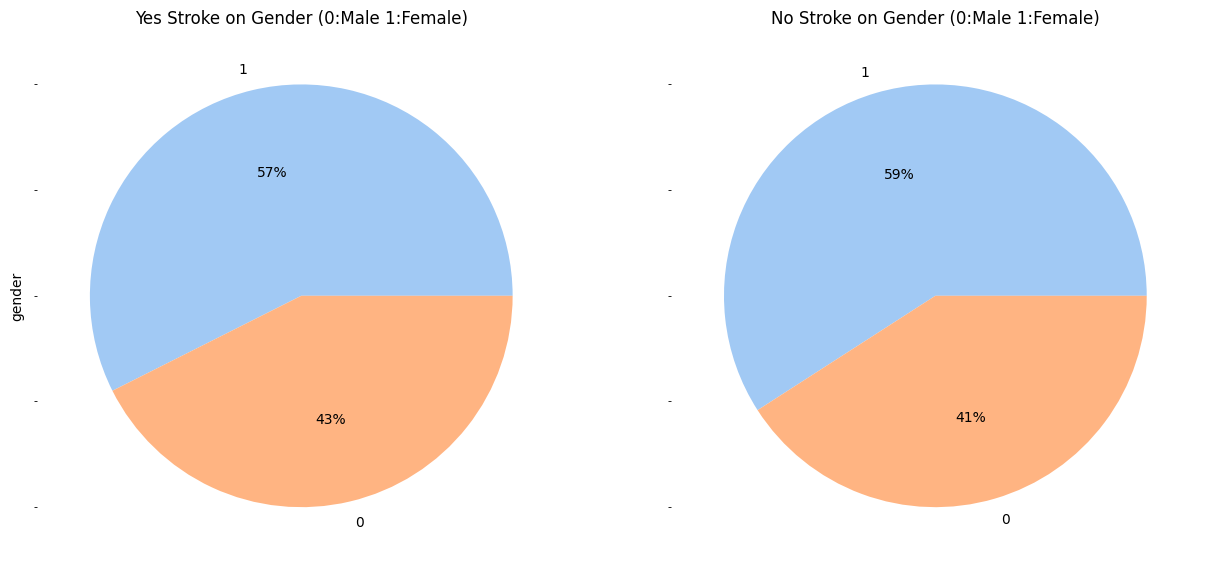

In [24]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

Yesstroke.gender.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Yes Stroke on Gender (0:Male 1:Female)")

Nostroke.gender.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("No Stroke on Gender (0:Male 1:Female)")

In [25]:
marrystroke = df[["stroke","ever_married"]]
Yesstroke = marrystroke.query('stroke == 1')
Nostroke = marrystroke.query('stroke == 0')
Yesstroke.ever_married.replace("Yes",0,inplace=True)
Yesstroke.ever_married.replace("No",1,inplace=True)
Nostroke.ever_married.replace("Yes",0,inplace=True)
Nostroke.ever_married.replace("No",1,inplace=True)

Text(0.5, 1.0, 'No Stroke on Marry (0:Married 1:Not)')

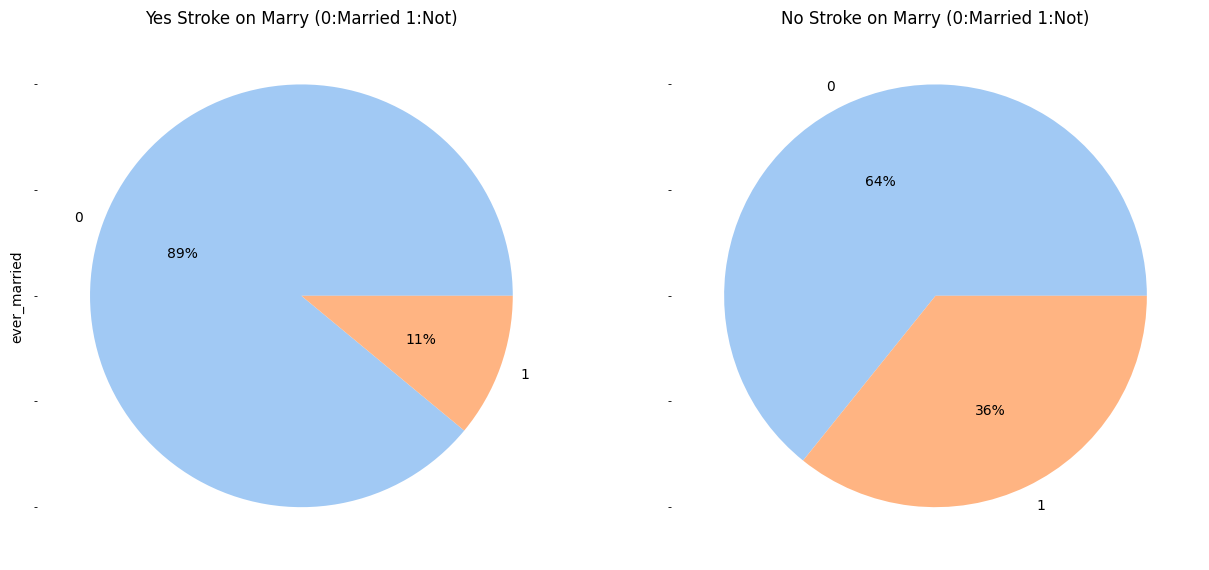

In [26]:
fig,axes = plt.subplots(1,2,figsize = (15,8),sharey=True)

Yesstroke.ever_married.value_counts().plot(ax = axes[0],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[0].set_title("Yes Stroke on Marry (0:Married 1:Not)")

Nostroke.ever_married.value_counts().plot(ax = axes[1],kind = "pie", autopct = "%.0f%%",colors = colors)
axes[1].set_title("No Stroke on Marry (0:Married 1:Not)")

In [27]:
correlation = df.corr()

<Axes: >

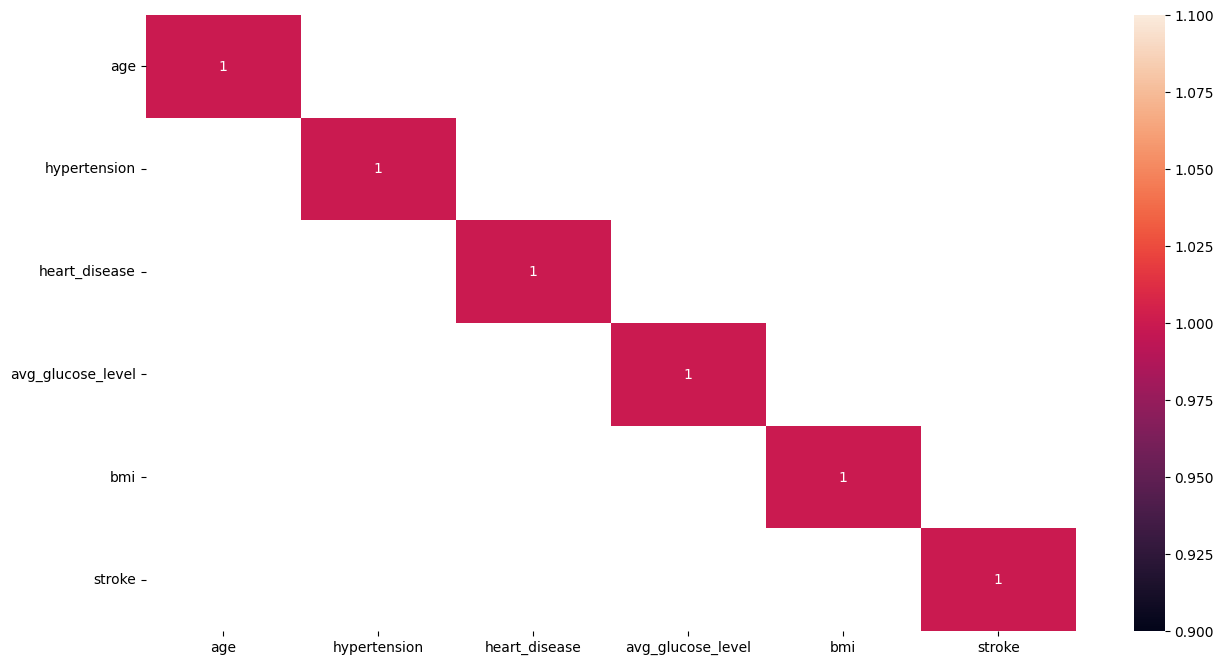

In [28]:
plt.figure(figsize = (15,8))
sns.heatmap(correlation,mask = correlation < 0.7,annot=True)

In [29]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5104  Female  13.0             0              0           No       children   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
5             Urban             186.21  29.0  formerly smoked       1  
...             ...                ...   ...              ...     ...  
5104          Rural             103.08  18.6          Unknown       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[4908 rows x 11 columns]

In [30]:
X = df.drop("stroke",axis = 1)
y =  df["stroke"]

In [31]:
X = X.drop("Residence_type",axis=1)

In [32]:
X.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

   avg_glucose_level   bmi   smoking_status  
0             228.69  36.6  formerly smoked  
2             105.92  32.5     never smoked  
3             171.23  34.4           smokes  
4             174.12  24.0     never smoked  
5             186.21  29.0  formerly smoked

In [38]:
cat_value = X.select_dtypes(exclude=np.number)

In [39]:
X = pd.get_dummies(X,columns=cat_value.columns)

In [40]:
X

age  hypertension  heart_disease  avg_glucose_level   bmi  \
0     67.0             0              1             228.69  36.6   
2     80.0             0              1             105.92  32.5   
3     49.0             0              0             171.23  34.4   
4     79.0             1              0             174.12  24.0   
5     81.0             0              0             186.21  29.0   
...    ...           ...            ...                ...   ...   
5104  13.0             0              0             103.08  18.6   
5106  81.0             0              0             125.20  40.0   
5107  35.0             0              0              82.99  30.6   
5108  51.0             0              0             166.29  25.6   
5109  44.0             0              0              85.28  26.2   

      gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0                 0            1                0                 1   
2                 0            1                0                 1   
3                 1            0                0                 1   
4                 1            0                0                 1   
5                 0            1                0                 1   
...             ...          ...              ...               ...   
5104              1            0                1                 0   
5106              1            0                0                 1   
5107              1            0                0                 1   
5108              0            1                0                 1   
5109              1            0                0                 1   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                      0                       0                  1   
2                      0                       0                  1   
3                      0                       0                  1   
4                      0                       0                  0   
5                      0                       0                  1   
...                  ...                     ...                ...   
5104                   0                       0                  0   
5106                   0                       0                  0   
5107                   0                       0                  0   
5108                   0                       0                  1   
5109                   1                       0                  0   

      work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                           0                   0                       0   
2                           0                   0                       0   
3                           0                   0                       0   
4                           1                   0                       0   
5                           0                   0                       0   
...                       ...                 ...                     ...   
5104                        0                   1                       1   
5106                        1                   0                       0   
5107                        1                   0                       0   
5108                        0                   0                       0   
5109                        0                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                                  1                            0   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
5                                  1                            0   
...                              ...                          ...   
5104                               0                            0   
5106   

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
xColumns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=xColumns)

In [44]:
X

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     1.069938     -0.318102       4.381499           2.777797  0.981145   
1     1.646336     -0.318102       4.381499           0.014016  0.459086   
2     0.271847     -0.318102      -0.228232           1.484266  0.701016   
3     1.601998      3.143642      -0.228232           1.549325 -0.623231   
4     1.690675     -0.318102      -0.228232           1.821493  0.013426   
...        ...           ...            ...                ...       ...   
4903 -1.324334     -0.318102      -0.228232          -0.049918 -1.310821   
4904  1.690675     -0.318102      -0.228232           0.448045  1.414072   
4905 -0.348890     -0.318102      -0.228232          -0.502181  0.217156   
4906  0.360524     -0.318102      -0.228232           1.373057 -0.419501   
4907  0.050155     -0.318102      -0.228232          -0.450629 -0.343102   

      gender_Female  gender_Male  ever_married_No  ever_married_Yes  \
0         -1.200240     1.200240        -0.729270          0.729270   
1         -1.200240     1.200240        -0.729270          0.729270   
2          0.833166    -0.833166        -0.729270          0.729270   
3          0.833166    -0.833166        -0.729270          0.729270   
4         -1.200240     1.200240        -0.729270          0.729270   
...             ...          ...              ...               ...   
4903       0.833166    -0.833166         1.371234         -1.371234   
4904       0.833166    -0.833166        -0.729270          0.729270   
4905       0.833166    -0.833166        -0.729270          0.729270   
4906      -1.200240     1.200240        -0.729270          0.729270   
4907       0.833166    -0.833166        -0.729270          0.729270   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0              -0.383751               -0.067102           0.864071   
1              -0.383751               -0.067102           0.864071   
2              -0.383751               -0.067102           0.864071   
3              -0.383751               -0.067102          -1.157312   
4              -0.383751               -0.067102           0.864071   
...                  ...                     ...                ...   
4903           -0.383751               -0.067102          -1.157312   
4904           -0.383751               -0.067102          -1.157312   
4905           -0.383751               -0.067102          -1.157312   
4906           -0.383751               -0.067102           0.864071   
4907            2.605854               -0.067102          -1.157312   

      work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                   -0.433030           -0.397953               -0.658022   
1                   -0.433030           -0.397953               -0.658022   
2                   -0.433030           -0.397953               -0.658022   
3                    2.309308           -0.397953               -0.658022   
4                   -0.433030           -0.397953               -0.658022   
...                       ...                 ...                     ...   
4903                -0.433030            2.512858                1.519706   
4904                 2.309308           -0.397953               -0.658022   
4905                 2.309308           -0.397953               -0.658022   
4906                -0.433030           -0.397953               -0.658022   
4907                -0.433030           -0.397953                1.519706   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                           2.206992                    -0.778473   
1                          -0.453105                     1.284565   
2                          -0.453105                    -0.778473   
3                          -0.453105                     1.284565   
4                           2.206992                    -0.778473   
...                              ...                 

In [45]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
X_train.count()

age                               3435
hypertension                      3435
heart_disease                     3435
avg_glucose_level                 3435
bmi                               3435
gender_Female                     3435
gender_Male                       3435
ever_married_No                   3435
ever_married_Yes                  3435
work_type_Govt_job                3435
work_type_Never_worked            3435
work_type_Private                 3435
work_type_Self-employed           3435
work_type_children                3435
smoking_status_Unknown            3435
smoking_status_formerly smoked    3435
smoking_status_never smoked       3435
smoking_status_smokes             3435
dtype: int64

In [49]:
rd = RandomForestClassifier()

In [50]:
rd.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = rd.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9504412763068567

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 

In [58]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_predknn = knn.predict(X_test)
accuracy_score(y_test,y_predknn)

0.9490835030549898

In [59]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predlr = lr.predict(X_test)
accuracy_score(y_test,y_predlr)

0.9511201629327902

In [60]:
parameters = {
    "n_estimators" : [50,100,200,400],
    "criterion" : ["gini","entropy","log_loss"],
    "max_depth" : [1,5,10,None],
    "max_features" : ["sqrt","log2",None]
    
}

In [61]:
rsc = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                         cv = 5,
                         verbose=1,
                         scoring="accuracy"
                        )

In [62]:
rsc.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [63]:
print("Best parameters : ",rsc.best_params_)
print("Best score {:.2f} ".format(rsc.best_score_))

Best parameters :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best score 0.96 


In [64]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [65]:
lsc = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=grid,
                         cv = 5,
                         verbose=1,
                         scoring="accuracy"
                        )

In [66]:
lsc.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [67]:
print("Best parameters : ",lsc.best_params_)
print("Best score {:.2f} ".format(lsc.best_score_))

Best parameters :  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score 0.96 


In [68]:
import pickle

In [107]:
filename = 'finalized_model.sav'
pickle.dump(rsc, open(filename, 'wb'))

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [97]:
feature_names = X.columns

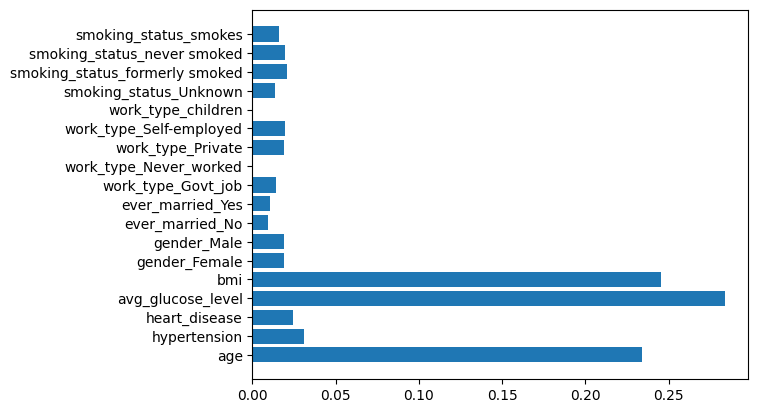

In [106]:
plt.barh(X.columns, rf.feature_importances_)
fig.tight_layout()

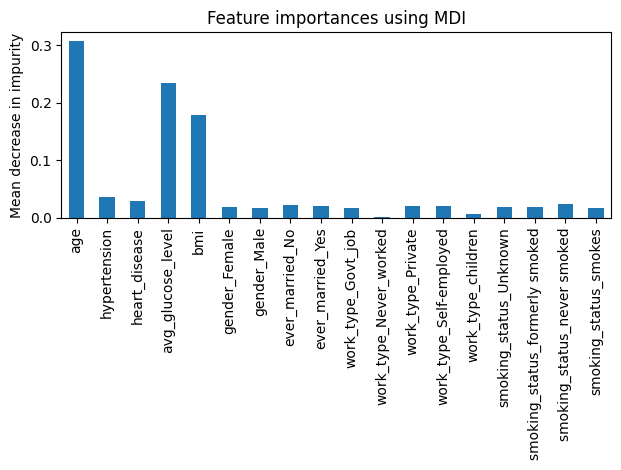

In [99]:
importances = rsc.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()